In [165]:
import pandas as pd
import os

In [166]:
BUCKET_URL="https://d4gc2024.s3.eu-central-1.amazonaws.com/data"

## Openstreetmap

Let's unpack the openstreetmap dataset:

In [167]:
openstreetmap_df=pd.read_csv("openstreetmap/stores.csv",index_col=0)
openstreetmap_df.head(10)

,lat,lon,city,housenumber,postcode,street,name,opening_hours,amenity_type,amenity_extra,website,x,y,statistical_sector
0,50.938502,4.735261,Rotselaar,12,3110,Aarschotsesteenweg,Laermans,Tu-Sa 07:00-18:00; Su 07:00-13:00,bakery,NaN,NaN,175761.078934,180975.547225,Vrouwenpark
1,50.929462,4.723867,Wilsele,551,3012,Aarschotsesteenweg,Salt & Sweet Bakery,Tu-We 08:30-17:30; Fr-Sa 07:00-16:00,bakery,NaN,NaN,174965.091164,179966.096448,Putkapel-centrum
2,50.924574,4.721162,Wilsele,433,3012,Aarschotsesteenweg,Au Flan Breton,NaN,bakery,NaN,https://www.auflanbreton.be/,174777.456178,179421.459572,Putkapel-centrum
3,50.910589,4.713789,Wilsele,334,3012,Aarschotsesteenweg,AFRIT 20,NaN,bar,cafe,NaN,174266.351311,177863.226255,Wilsele-centrum
4,50.916940,4.716932,Leuven,283,3012,Aarschotsesteenweg,Jodi - Kaas- en Vleeshandel,NaN,butcher_shop,NaN,NaN,174484.091307,178570.733533,Putkapel-centrum
5,50.914754,4.715682,Wilsele,237,3012,Aarschotsesteenweg,Bij Sophie,Mo-Fr 10:00-15:00,fast_food,sandwich_shop,NaN,174397.315607,178327.202473,Putkapel-centrum
6,50.921672,4.719519,Wilsele,381,3012,Aarschotsesteenweg,Döner Kebap Euro,Th-Tu 16:00-23:00,fast_food,kebab,NaN,174663.460826,179098.009571,Putkapel-centrum
7,50.914824,4.715723,Wilsele,239,3012,Aarschotsesteenweg,De Vuntzak,"Mo,Tu,We,Fr,Sa 17:00-21:00",fast_food,friture,https://devuntzak.klikeneet.be/,174400.169428,178335.002921,Putkapel-centrum
8,50.912053,4.714179,Wilsele,195,3012,Aarschotsesteenweg,Luc's Friet,NaN,fast_food,friture,https://lucsfriet.be/,174293.034459,178026.267381,Wilsele-centrum
9,50.926299,4.722539,Wilsele,696,3012,Aarschotsesteenweg,Smekke,"Mo-Fr 11:30-14:00,16:45-21:00",fast_food,friture,https://frituursmekke.klikeneet.be/,174873.348182,179613.713111,Putkapel-centrum


Let's use the coordinates provided for each place to plot them based on amenity type:

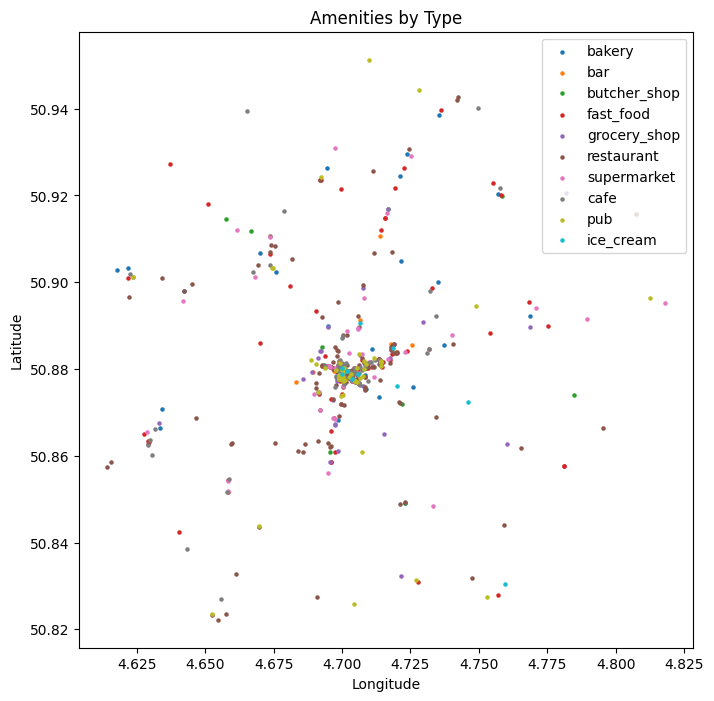

In [168]:
import matplotlib.colors as mcolors
import geopandas as gpd
import matplotlib.pyplot as plt

# Assign a unique color to each amenity type
openstreetmap_df['geometry'] = gpd.points_from_xy(openstreetmap_df['lon'], openstreetmap_df['lat'])
geo_df = gpd.GeoDataFrame(openstreetmap_df, geometry='geometry', crs="WGS84")
amenity_types = openstreetmap_df['amenity_type'].unique()
colors = {amenity: color for amenity, color in zip(amenity_types, mcolors.TABLEAU_COLORS)}

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
for amenity_type, color in colors.items():
    subset = geo_df[geo_df['amenity_type'] == amenity_type]
    subset.plot(ax=ax, marker='o', color=color, label=amenity_type, markersize=5)

plt.legend()
plt.title("Amenities by Type")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


Let's use the coordinates provided for each place to plot their density across Leuven:

In [169]:
from folium.plugins import HeatMap
import folium

# Create a base map
m = folium.Map(location=[openstreetmap_df['lat'].mean(), openstreetmap_df['lon'].mean()], zoom_start=14)

# Add heatmap
heat_data = [[row['lat'], row['lon']] for index, row in openstreetmap_df.iterrows()]
HeatMap(heat_data).add_to(m)
m

In [170]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Example DataFrame (replace this with your `openstreetmap_df`)
# openstreetmap_df = pd.DataFrame({
#     'lon': [-73.985428, -73.9851, -73.9847],
#     'lat': [40.748817, 40.749, 40.7485],
#     'amenity_type': ['restaurant', 'cafe', 'bar']
# })

# Unique amenity types and their colors
amenity_types = openstreetmap_df['amenity_type'].unique()
colors = px.colors.qualitative.T10[:len(amenity_types)]  # Use a qualitative color scale
color_map = {amenity: color for amenity, color in zip(amenity_types, colors)}

# Create the map figure
fig = go.Figure()

# Add points for each amenity type
for amenity_type, color in color_map.items():
    subset = openstreetmap_df[openstreetmap_df['amenity_type'] == amenity_type]
    fig.add_trace(go.Scattermapbox(
        lon=subset['lon'],
        lat=subset['lat'],
        mode='markers',
        marker=dict(size=10, color=color),
        name=amenity_type
    ))

# Set up the map layout
fig.update_layout(
    mapbox=dict(
        style="open-street-map",
        zoom=12,
        center=dict(lat=openstreetmap_df['lat'].mean(), lon=openstreetmap_df['lon'].mean()),
    ),
    legend=dict(title="Amenity Types"),
    title="Amenities by Type",
    margin={"r":0,"t":40,"l":0,"b":0}
)

fig.show()


In [171]:
import plotly.graph_objects as go

# Example DataFrame (replace this with your `places_grades_df`)
places_grades_df = pd.DataFrame({
    'lat': [40.748817, 40.749, 40.7485],
    'lon': [-73.985428, -73.9851, -73.9847],
    'grade': [3.0, 2.0, 4.5],
    'feedbacks_amount': [100, 50, 200],
    'store_name': ['Store A', 'Store B', 'Store C']
})

# Define color based on grade
places_grades_df['color'] = places_grades_df['grade'].apply(lambda g: 'green' if g > 2.5 else 'red')

# Create the map figure
fig = go.Figure()

# Add points for grades > 2.5 (green)
fig.add_trace(go.Scattermapbox(
    lon=places_grades_df[places_grades_df['color'] == 'green']['lon'],
    lat=places_grades_df[places_grades_df['color'] == 'green']['lat'],
    mode='markers',
    marker=dict(
        size=places_grades_df[places_grades_df['color'] == 'green']['feedbacks_amount'],
        color='green',
        opacity=0.7
    ),
    name="Grade > 2.5",
    text=places_grades_df[places_grades_df['color'] == 'green']['store_name'] + 
         "<br>Grade: " + places_grades_df[places_grades_df['color'] == 'green']['grade'].astype(str) +
         "<br>Feedbacks: " + places_grades_df[places_grades_df['color'] == 'green']['feedbacks_amount'].astype(str),
    hoverinfo='text'
))

# Add points for grades <= 2.5 (red)
fig.add_trace(go.Scattermapbox(
    lon=places_grades_df[places_grades_df['color'] == 'red']['lon'],
    lat=places_grades_df[places_grades_df['color'] == 'red']['lat'],
    mode='markers',
    marker=dict(
        size=places_grades_df[places_grades_df['color'] == 'red']['feedbacks_amount'],
        color='red',
        opacity=0.7
    ),
    name="Grade ≤ 2.5",
    text=places_grades_df[places_grades_df['color'] == 'red']['store_name'] + 
         "<br>Grade: " + places_grades_df[places_grades_df['color'] == 'red']['grade'].astype(str) +
         "<br>Feedbacks: " + places_grades_df[places_grades_df['color'] == 'red']['feedbacks_amount'].astype(str),
    hoverinfo='text'
))

# Set up the map layout
fig.update_layout(
    mapbox=dict(
        style="open-street-map",
        zoom=12,
        center=dict(lat=places_grades_df['lat'].mean(), lon=places_grades_df['lon'].mean()),
    ),
    title="Store Grades and Feedbacks",
    legend=dict(title="Legend"),
    margin={"r":0,"t":40,"l":0,"b":0}
)

fig.show()


## Food Saving Leuven

We present below the Logical Data Model of the FSL datasets:

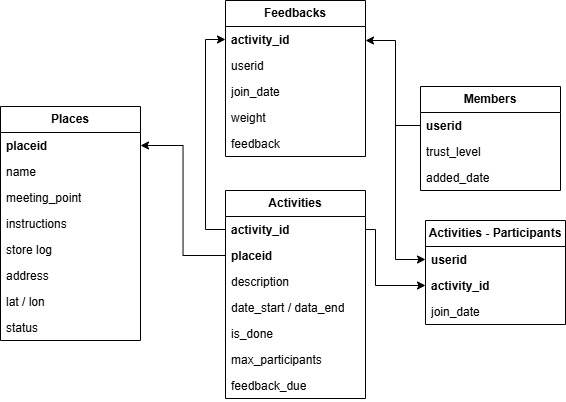

Next, we load all five datasets:

In [172]:
filenames=["foodsavingleuven/places.csv",
           "foodsavingleuven/members.csv"	,
           "foodsavingleuven/activities.csv",
           "foodsavingleuven/activities_participants.csv",
            "foodsavingleuven/feedback.csv"]

In [173]:
places_df=pd.read_csv(filenames[0],index_col=0)
places_df.head()

,name,placeid,meeting_point,instructions,store_log,address,latitude,longitude,status
0,Spar,854,Outside the shop,"You can expect anything from this shop, but us...",[2021/11] Ali and Kranti went there and spoke ...,"Brusselsestraat 124, Leuven, Flemish Brabant, ...",50.880741,4.694760,active
1,Shop & Go Delhaize,2766,Outside the shop,"You can expect anything from this shop, but us...",It was very easy to talk to the owner! He is r...,"Diestsestraat 228, Leuven, Flemish Brabant, 30...",50.881850,4.713093,active
2,Exotic World,2642,In front of the store - contact the lady at th...,Usually packaged items past their best-before ...,NaN,"Brusselsestraat 44, Leuven, Flemish Brabant, 3...",50.881096,4.690018,active
3,Delhaize Leuven,858,Outside the shop,"Mainly bread and pastries, can be a lot, so be...",[17/12/2022] Pickups Restarted\nThe pickup tim...,"Brusselsestraat 31, Leuven, Flemish Brabant, 3...",50.879549,4.698835,active
4,Carrefour Express,760,Outside the shop,"You can expect anything from this shop, but us...","During corona, the shop closed. and wasn't ope...","Rector de Somerplein 12, Leuven, Flemish Braba...",50.879021,4.703237,active


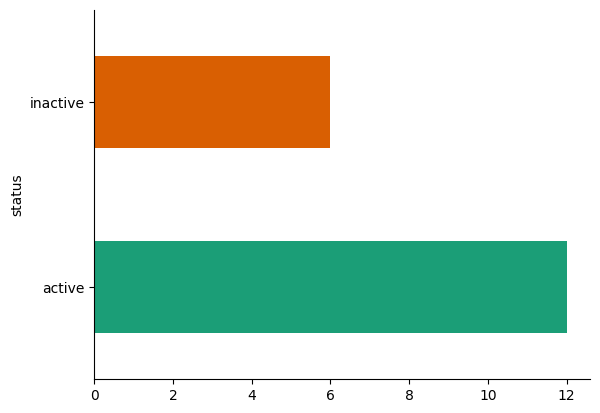

In [174]:
# @title status

from matplotlib import pyplot as plt
import seaborn as sns
places_df.groupby('status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [175]:
members_df=pd.read_csv(filenames[1],index_col=0)
members_df.head()

,userid,trust_level,added_date
0,12881,0,"Oct 31, 2024, 1:08 PM"
1,15945,0,"Oct 30, 2024, 7:00 AM"
2,15980,0,"Oct 29, 2024, 8:00 PM"
3,8826,0,"Oct 29, 2024, 7:56 PM"
4,17438,0,"Oct 29, 2024, 7:56 PM"


In [176]:
activities_df=pd.read_csv(filenames[2],index_col=0)
activities_df.head()

,activity_id,date_start,date_end,placeid,description,is_done,max_participants,feedback_due
0,481609,2024-11-16T18:25:00+01:00,2024-11-16T18:55:00+01:00,854,Meeting point: Outside the shop Closest HUB -...,True,3.0,2024-12-16T18:55:00+01:00
1,481581,2024-11-16T17:55:00+01:00,2024-11-16T18:25:00+01:00,858,Meeting point: just inside the shop (read full...,True,5.0,2024-12-16T18:25:00+01:00
2,481330,2024-11-15T20:15:00+01:00,2024-11-15T20:45:00+01:00,760,Meeting point: Outside the shop Closest HUB ...,True,2.0,2024-12-15T20:45:00+01:00
3,479076,2024-11-15T19:55:00+01:00,2024-11-15T20:25:00+01:00,2766,- Closest HUB - AGORA learning centre (for bre...,True,1.0,2024-12-15T20:25:00+01:00
4,479019,2024-11-15T19:00:00+01:00,2024-11-15T19:30:00+01:00,2642,Meeting point: Outside the shop Closest HUB ...,True,3.0,2024-12-15T19:30:00+01:00


In [177]:
activities_participants_df=pd.read_csv(filenames[3],index_col=0)
activities_participants_df.head()

,userid,activity_id,join_date
0,12899,481609,2024-11-15T17:14:26.242280Z
1,6108,481609,2024-11-15T20:34:36.798360Z
2,16248,481609,2024-11-15T20:36:21.153325Z
3,17933,481581,2024-11-12T12:34:58.524724Z
4,16214,481581,2024-11-15T08:53:30.830372Z


In [178]:
feedback_df=pd.read_csv(filenames[4],index_col=0)
feedback_df.head()

,activity_id,join_date,userid,weight,feedback
0,481609,2024-11-16T19:37:03.575551Z,16248,0.0,NaN
1,481581,2024-11-16T18:39:25.724286Z,17933,0.1,NaN
2,481330,2024-11-16T15:05:40.050020Z,2769,1.0,NaN
3,479076,2024-11-15T19:48:08.385199Z,15945,6.0,the guy working there was super kind: got 6 re...
4,479019,2024-11-16T14:44:53.508255Z,15907,12.0,canned jackfruit \n seasoning for meat \n mayo...


Below we provide possible ways to merge the datasets for a more comprehensive analysis:

In [179]:
# Merging activities_df with places_df on the "placeid" column
# Using a LEFT JOIN to keep all rows from activities_df
(activities_df
.merge(places_df, on="placeid", how="left")
).head()

,activity_id,date_start,date_end,placeid,description,is_done,max_participants,feedback_due,name,meeting_point,instructions,store_log,address,latitude,longitude,status
0,481609,2024-11-16T18:25:00+01:00,2024-11-16T18:55:00+01:00,854,Meeting point: Outside the shop Closest HUB -...,True,3.0,2024-12-16T18:55:00+01:00,Spar,Outside the shop,"You can expect anything from this shop, but us...",[2021/11] Ali and Kranti went there and spoke ...,"Brusselsestraat 124, Leuven, Flemish Brabant, ...",50.880741,4.694760,active
1,481581,2024-11-16T17:55:00+01:00,2024-11-16T18:25:00+01:00,858,Meeting point: just inside the shop (read full...,True,5.0,2024-12-16T18:25:00+01:00,Delhaize Leuven,Outside the shop,"Mainly bread and pastries, can be a lot, so be...",[17/12/2022] Pickups Restarted\nThe pickup tim...,"Brusselsestraat 31, Leuven, Flemish Brabant, 3...",50.879549,4.698835,active
2,481330,2024-11-15T20:15:00+01:00,2024-11-15T20:45:00+01:00,760,Meeting point: Outside the shop Closest HUB ...,True,2.0,2024-12-15T20:45:00+01:00,Carrefour Express,Outside the shop,"You can expect anything from this shop, but us...","During corona, the shop closed. and wasn't ope...","Rector de Somerplein 12, Leuven, Flemish Braba...",50.879021,4.703237,active
3,479076,2024-11-15T19:55:00+01:00,2024-11-15T20:25:00+01:00,2766,- Closest HUB - AGORA learning centre (for bre...,True,1.0,2024-12-15T20:25:00+01:00,Shop & Go Delhaize,Outside the shop,"You can expect anything from this shop, but us...",It was very easy to talk to the owner! He is r...,"Diestsestraat 228, Leuven, Flemish Brabant, 30...",50.881850,4.713093,active
4,479019,2024-11-15T19:00:00+01:00,2024-11-15T19:30:00+01:00,2642,Meeting point: Outside the shop Closest HUB ...,True,3.0,2024-12-15T19:30:00+01:00,Exotic World,In front of the store - contact the lady at th...,Usually packaged items past their best-before ...,NaN,"Brusselsestraat 44, Leuven, Flemish Brabant, 3...",50.881096,4.690018,active


In [180]:
# Merging multiple DataFrames to combine participant data, member details, and feedback:
(
    activities_participants_df
    # First, merge participant data with member information using the "userid" column
    .merge(members_df, on="userid", how="left")
    # Then, merge the resulting DataFrame with feedback information
    # This merge is based on both "userid" and "activity_id" columns
    .merge(feedback_df, on=["userid", "activity_id"], how="left", suffixes=["_activity", "_feedback"])
).head()

,userid,activity_id,join_date_activity,trust_level,added_date,join_date_feedback,weight,feedback
0,12899,481609,2024-11-15T17:14:26.242280Z,1.0,"Sep 24, 2022, 12:23 PM",NaN,NaN,NaN
1,6108,481609,2024-11-15T20:34:36.798360Z,3.0,"Sep 24, 2023, 9:19 AM",NaN,NaN,NaN
2,16248,481609,2024-11-15T20:36:21.153325Z,6.0,"Sep 24, 2023, 9:18 AM",2024-11-16T19:37:03.575551Z,0.0,NaN
3,17933,481581,2024-11-12T12:34:58.524724Z,0.0,"Sep 11, 2024, 11:08 AM",2024-11-16T18:39:25.724286Z,0.1,NaN
4,16214,481581,2024-11-15T08:53:30.830372Z,0.0,"Sep 30, 2024, 9:19 PM",NaN,NaN,NaN


In [181]:
(
    # Start with the activities participants DataFrame
    activities_participants_df
    # Merge with the members DataFrame to add user details using the "userid" column
    .merge(members_df, on="userid", how="left")
    # Merge the resulting DataFrame with feedback data
    # Use both "userid" and "activity_id" as keys to include feedback for specific activities
    .merge(
        feedback_df,
        on=["userid", "activity_id"],
        how="left",
        suffixes=["_activity", "_feedback"]  # Add suffixes to avoid column name conflicts
    )
    # Merge with activities DataFrame to add activity-specific details using "activity_id"
    .merge(activities_df, on="activity_id", how="left")
    # Merge with places DataFrame to add location information using the "placeid" column
    .merge(places_df, on="placeid", how="left")
).head()


,userid,activity_id,join_date_activity,trust_level,added_date,join_date_feedback,weight,feedback,date_start,date_end,...,max_participants,feedback_due,name,meeting_point,instructions,store_log,address,latitude,longitude,status
0,12899,481609,2024-11-15T17:14:26.242280Z,1.0,"Sep 24, 2022, 12:23 PM",NaN,NaN,NaN,2024-11-16T18:25:00+01:00,2024-11-16T18:55:00+01:00,...,3.0,2024-12-16T18:55:00+01:00,Spar,Outside the shop,"You can expect anything from this shop, but us...",[2021/11] Ali and Kranti went there and spoke ...,"Brusselsestraat 124, Leuven, Flemish Brabant, ...",50.880741,4.694760,active
1,6108,481609,2024-11-15T20:34:36.798360Z,3.0,"Sep 24, 2023, 9:19 AM",NaN,NaN,NaN,2024-11-16T18:25:00+01:00,2024-11-16T18:55:00+01:00,...,3.0,2024-12-16T18:55:00+01:00,Spar,Outside the shop,"You can expect anything from this shop, but us...",[2021/11] Ali and Kranti went there and spoke ...,"Brusselsestraat 124, Leuven, Flemish Brabant, ...",50.880741,4.694760,active
2,16248,481609,2024-11-15T20:36:21.153325Z,6.0,"Sep 24, 2023, 9:18 AM",2024-11-16T19:37:03.575551Z,0.0,NaN,2024-11-16T18:25:00+01:00,2024-11-16T18:55:00+01:00,...,3.0,2024-12-16T18:55:00+01:00,Spar,Outside the shop,"You can expect anything from this shop, but us...",[2021/11] Ali and Kranti went there and spoke ...,"Brusselsestraat 124, Leuven, Flemish Brabant, ...",50.880741,4.694760,active
3,17933,481581,2024-11-12T12:34:58.524724Z,0.0,"Sep 11, 2024, 11:08 AM",2024-11-16T18:39:25.724286Z,0.1,NaN,2024-11-16T17:55:00+01:00,2024-11-16T18:25:00+01:00,...,5.0,2024-12-16T18:25:00+01:00,Delhaize Leuven,Outside the shop,"Mainly bread and pastries, can be a lot, so be...",[17/12/2022] Pickups Restarted\nThe pickup tim...,"Brusselsestraat 31, Leuven, Flemish Brabant, 3...",50.879549,4.698835,active
4,16214,481581,2024-11-15T08:53:30.830372Z,0.0,"Sep 30, 2024, 9:19 PM",NaN,NaN,NaN,2024-11-16T17:55:00+01:00,2024-11-16T18:25:00+01:00,...,5.0,2024-12-16T18:25:00+01:00,Delhaize Leuven,Outside the shop,"Mainly bread and pastries, can be a lot, so be...",[17/12/2022] Pickups Restarted\nThe pickup tim...,"Brusselsestraat 31, Leuven, Flemish Brabant, 3...",50.879549,4.698835,active


## Leuven Demographics
Here is how to load the data for the Leuven Demographics datasets:

In [182]:
import pandas as pd
import os

sheets = {
    "commercial_catering": ("leuven_demographics/commercial_stats.xlsx", "catering"),
    "commercial_consumer": ("leuven_demographics/commercial_stats.xlsx", "consumer_services"),
    "demographics_age": ("leuven_demographics/demographics.xlsx", "age"),
    "demographics_nationality": ("leuven_demographics/demographics.xlsx", "nationality"),
    "demographics_household": ("leuven_demographics/demographics.xlsx", "household"),
    "income_income": ("leuven_demographics/income.xlsx", "income"),
    "income_taxpayers": ("leuven_demographics/income.xlsx", "taxpayers"),
    "income_declarations": ("leuven_demographics/income.xlsx", "declarations"),
    "space_residential_units": ("leuven_demographics/space_and_housing.xlsx", "residential_units"),
    "space_space_occupations": ("leuven_demographics/space_and_housing.xlsx", "space_occupation")
}

# Load data into a dictionary of DataFrames
dataframes = {
    key: pd.read_excel(
        file,
        sheet_name=sheet,
        index_col=0
    ).rename_axis("statistical_sector")
    for key, (file, sheet) in sheets.items()
}

# Unpack specific DataFrames for direct use
(
    commercial_catering_df,
    commercial_consumer_df,
    demographics_age_df,
    demographics_nationality_df,
    demographics_household_df,
    income_income_df,
    income_taxpayers_df,
    income_declarations_df,
    space_residential_units_df,
    space_space_occupations_df
) = dataframes.values()

Let's plot the distribution of nationalities across all statistical sectors:

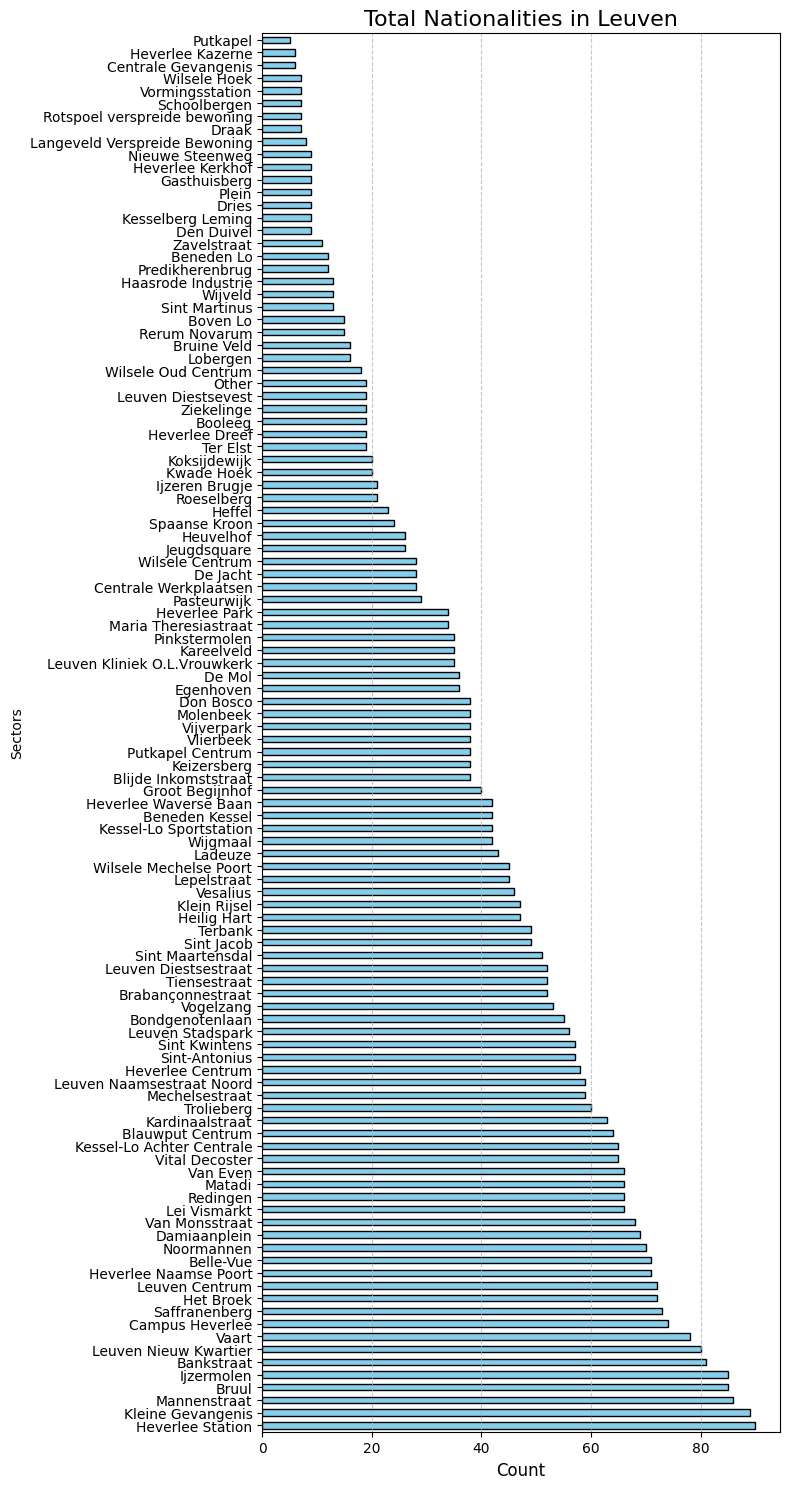

In [183]:
import matplotlib.pyplot as plt

data = demographics_nationality_df["Total_Nationalities"]
data_grouped = data.sort_values(ascending=False).copy()

threshold = 5
others = data_grouped[data_grouped < threshold].sum()
data_grouped = data_grouped[data_grouped >= threshold]
data_grouped["Other"] = others

data_grouped.sort_values(ascending=False).plot.barh(
    figsize=(8, 15),
    color="skyblue",
    edgecolor="black"
)
plt.title("Total Nationalities in Leuven", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Sectors", fontsize=10)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()


Let's plot the distribution of average net income per capita across sectors across all statistical sectors:

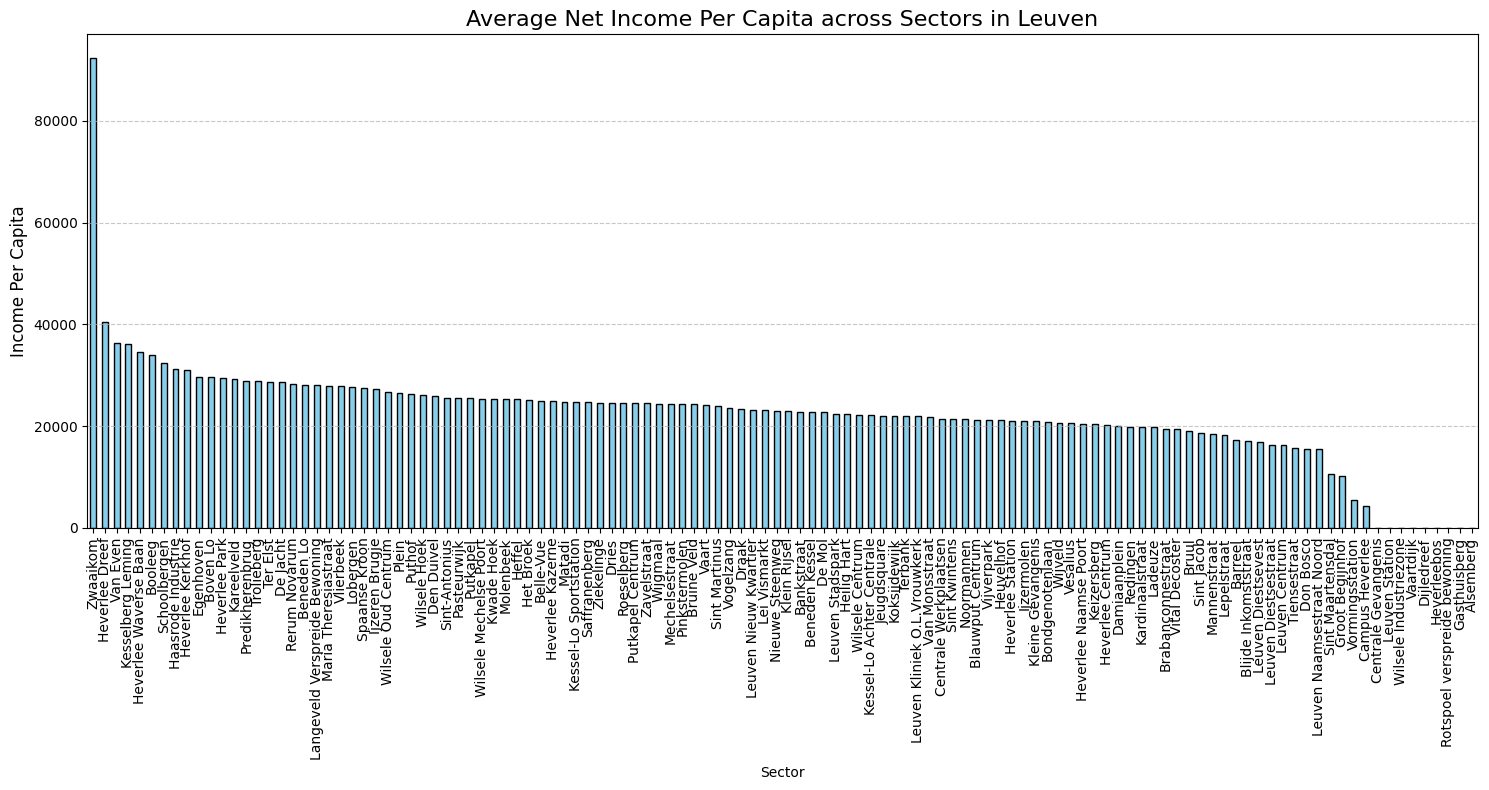

In [184]:
import matplotlib.pyplot as plt

data = income_income_df["avg_net_taxable_income_per_capita"].sort_values(ascending=False).copy()

data.sort_values(ascending=False).plot.bar(
    figsize=(15, 8),
    color="skyblue",
    edgecolor="black"
)
plt.title("Average Net Income Per Capita across Sectors in Leuven", fontsize=16)
plt.ylabel("Income Per Capita", fontsize=12)
plt.xlabel("Sector", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()

# Test Open Street Food Leuven Places

In [185]:
# Merging multiple DataFrames to combine participant data, member details, and feedback:
places_df = places_df.rename(columns={"latitude": "lat", "longitude": "lon"})

In [186]:
print(places_df[['lat', 'lon']].isnull().sum())
print(openstreetmap_df[['lat', 'lon']].isnull().sum())


lat    1
lon    1
dtype: int64
lat    0
lon    0
dtype: int64


In [187]:
places_df = places_df.dropna(subset=['lat', 'lon'])
openstreetmap_df = openstreetmap_df.dropna(subset=['lat', 'lon'])


In [188]:
import pandasql as ps

In [191]:
import geopandas as gpd
from shapely.geometry import Point

# Merging multiple DataFrames to combine participant data, member details, and feedback:
places_df = places_df.rename(columns={"latitude": "lat", "longitude": "lon"})

import pandas as pd

# Sort both DataFrames by latitude
places_df = places_df.sort_values(by="lat")
openstreetmap_df = openstreetmap_df.sort_values(by="lat")

# Perform an approximate merge on latitude
lat_merged = pd.merge_asof(
    places_df, openstreetmap_df, on="lat", direction="nearest", tolerance=0.0001
)

lat_merged

lat_merged = lat_merged.rename(columns={"lon_x": "lon"})

# # Perform an approximate merge on longitude (filter lat_merged first for efficiency)
final_merge = pd.merge_asof(
    lat_merged.sort_values(by="lon"), openstreetmap_df.sort_values(by="lon"), on="lon", direction="nearest", tolerance=0.000001
)

# Drop columns that end with '_y'
columns_to_drop = [col for col in final_merge.columns if col.endswith('_y')]
columns_to_drop.append("name")
final_merge = final_merge.drop(columns=columns_to_drop)
# Remove '_x' from column names
final_merge = final_merge.rename(columns={col: col.replace('_x', '') for col in final_merge.columns if '_x' in col})


final_merge

# (
#     places_df
#     .merge(openstreetmap_df, on=["lat", "lon"], how="left")
# ).head()

,name,placeid,meeting_point,instructions,store_log,address,lat,lon,status,city,...,postcode,street,opening_hours,amenity_type,amenity_extra,website,x,y,statistical_sector,geometry
0,Exotic World,2642,In front of the store - contact the lady at th...,Usually packaged items past their best-before ...,NaN,"Brusselsestraat 44, Leuven, Flemish Brabant, 3...",50.881096,4.690018,active,Leuven,...,3000.0,Mechelsestraat,NaN,restaurant,lunch,NaN,173268.672970,174576.996697,Lei - vismarkt,POINT (4.6994 50.88109)
1,OHL stadium,2188,NaN,NaN,OHL stadium makes events and contacts us when ...,NaN,50.867904,4.693608,active,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,Miscellaneous,885,Meet up place is in front of the church,Pick up food (mostly vegetables) from the stan...,"put on not cooperating for the moment, see wal...",NaN,50.864478,4.693981,inactive,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,Spar,854,Outside the shop,"You can expect anything from this shop, but us...",[2021/11] Ali and Kranti went there and spoke ...,"Brusselsestraat 124, Leuven, Flemish Brabant, ...",50.880741,4.694760,active,Leuven,...,3000.0,Brusselsestraat,Mo-Fr 08:00-20:00; Sa 08:00-18:30,supermarket,NaN,https://www.sparretail.be/nl/store/2562,172940.810100,174536.987279,Bruul,POINT (4.69473 50.88074)
4,Dr Blues,2091,NaN,NaN,Beers from 'dr blues' every now and then.,"Redingenhof, Janseniushof, Leuven, Flemish Bra...",50.875172,4.697071,active,Leuven,...,3000.0,Tiensestraat,NaN,food_court,NaN,https://foodcentral.be/,173923.216106,173920.521641,Vesalius,POINT (4.70865 50.87516)
5,Carrefour Express,843,Outside the shop,Mainly bread and pastries.\nRedistribution: we...,[2021/11] Ali and Kranti visited the shops. Th...,"Brusselsestraat 60, Leuven, Flemish Brabant, 3...",50.880237,4.697321,active,Leuven,...,3000.0,Brusselsestraat,Mo-Su 08:00-20:00,supermarket,NaN,https://winkels.carrefour.be/nl/s/carrefour/ca...,173123.110124,174481.592539,Lei - vismarkt,POINT (4.69732 50.88024)
6,Circle,871,in front of the store - contact the lady at t...,Usually packaged items past its best-before da...,NaN,"Brusselsestraat 48, Leuven, Flemish Brabant, 3...",50.880103,4.697756,active,Leuven,...,3000.0,Brusselsestraat,Mo-Su 10:00-19:00,supermarket,asian,https://www.facebook.com/people/circle-superma...,173153.775452,174466.788685,Lei - vismarkt,POINT (4.69776 50.8801)
7,Miscellaneous,2593,NaN,NaN,This is an annual activity. \nThis is an invit...,"Parijsstraat 70, Leuven, Flemish Brabant, 3000...",50.877325,4.698165,inactive,Leuven,...,3000.0,Minderbroedersstraat,NaN,grocery_shop,night_shop,NaN,173184.001907,174158.135153,Damiaanplein,POINT (4.69817 50.87733)
8,Delhaize Leuven,858,Outside the shop,"Mainly bread and pastries, can be a lot, so be...",[17/12/2022] Pickups Restarted\nThe pickup tim...,"Brusselsestraat 31, Leuven, Flemish Brabant, 3...",50.879549,4.698835,active,Leuven,...,3000.0,Brusselsestraat,Mo-Fr 08:30-18:30; Sa 08:30-18:00,supermarket,grocery_store,https://addelhaizeleuven-denon.be,173229.977590,174405.510151,Leuven-centrum,POINT (4.69883 50.87955)
9,Panos,1480,Wait outside the entrance for others (signed u...,"Mainly bread, sandwiches and pastries.\nRedist...",[20/08/2023] Store discontinued. The reason fo...,"Brusselsestraat 4, Leuven, Flemish Brabant, 30...",50.879493,4.700115,active,Leuven,...,3000.0,Brusselsestraat,Mo-Sa 07:00-18:00,fast_food,sandwich,https://www.panos.be/,173320.149791,174399.716370,Leuven-centrum,POINT (4.70012 50.87949)
